#Proyecto Data Science

## Primera Preentrega

### Abstract

El Dataset escogido contiene datos (10064 filas y 35 columnas) de estudiantes universitarios y diversos factores que influyen en la calificación final del examen. Entre los factores que son registrados en este conjunto de datos se pueden encontrar antecedentes familiares, económicos, académicos, estilo de vida, entre otros.

Haciendo uso de estos datos sea desea conocer cuales son los factores más influyentes en las calificaciones de los estudiantes para lograr de esta manera conocer en qué aspectos sería posible brindar apoyo a los estudiantes para que obtengan mejores calificaciones.

### Abstract

Previo a las visualizaciones generadas se realizan las siguientes hipótesis sobre las calificaciones de los estudiantes:


1.   La cantidad de horas de estudio y asistencia a clases de los estudiantes es uno de los factores más importantes en las calificaciones de los estudiantes.
2.   Existen variables que influyen en las calificaciones de los estudiantes, pero por si solas no es evidente su contribución.



###Importación de Librerías y Carga de Datos

In [9]:
#Importar Librerías
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

In [10]:
# Cargar el dataset desde un archivo CSV
df = pd.read_csv('Factors_ affecting_ university_student_grades_dataset.csv', delimiter = ';')

# Imprimir las primeras 10 filas del dataset
print(df.head(10))

    Age Gender Parental_Education Family_Income Previous_Grades  Attendance  \
0  22.0      F            College         50000               A        81.0   
1  21.0      M                NaN         60000               A         NaN   
2  19.0      M            College         75000               C        93.0   
3  21.0      M            College         60000               A        86.0   
4  19.0    NaN                NaN         40000             NaN        89.0   
5  19.0      M            College         40000               C        82.0   
6  20.0    NaN                NaN           NaN               A        84.0   
7  21.0      M            College         40000             NaN        75.0   
8  19.0      M        High School         75000               C        73.0   
9  21.0      F           Graduate         30000               A        81.0   

  Class_Participation  Study_Hours     Major School_Type  ... Peer_Group  \
0              Medium          8.0       Law     Priva

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10064 entries, 0 to 10063
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          9099 non-null   float64
 1   Gender                       9085 non-null   object 
 2   Parental_Education           9102 non-null   object 
 3   Family_Income                9097 non-null   object 
 4   Previous_Grades              9120 non-null   object 
 5   Attendance                   9060 non-null   float64
 6   Class_Participation          9098 non-null   object 
 7   Study_Hours                  9073 non-null   float64
 8   Major                        9136 non-null   object 
 9   School_Type                  9115 non-null   object 
 10  Financial_Status             9129 non-null   object 
 11  Parental_Involvement         9118 non-null   object 
 12  Educational_Resources        9129 non-null   object 
 13  Motivation      

Descripción de las Columnas:


* **Age**: La edad del estudiante.
* **Gender**: El género del estudiante (M para Masculino, F para Femenino).
* **Parental_Education**: El nivel más alto de educación alcanzado por los padres del estudiante.
* **Family_Income**: El nivel de ingresos de la familia.
* **Previous_Grades**: El rendimiento académico previo del estudiante (calificaciones A, B o C).
* **Attendance**: El porcentaje de asistencia a clases.
* **Class_Participation**: El nivel de participación en actividades de clase (Bajo, Medio o Alto).
* **Study_Hours**: El número promedio de horas de estudio por semana.
* **Major**: La carrera o campo de estudio del estudiante.
* **Uni_Type**: El tipo de universidad a la que asiste (Pública o Privada).
* **Financial_Status**: El estado financiero del estudiante (Bajo, Medio o Alto).
* **Parental_Involvement**: El nivel de implicación de los padres en la educación del estudiante (Bajo, Medio o Alto).
* **Educational_Resources**: Disponibilidad de recursos educativos en casa (Sí o No).
* **Motivation**: El nivel de motivación hacia los estudios (Bajo, Medio o Alto).
* **Self_Esteem**: El nivel de autoestima (Bajo, Medio o Alto).
* **Stress_Levels**: El nivel de estrés experimentado por el estudiante (Bajo, Medio o Alto).
* **School_Environment**: Percepción del ambiente escolar (Negativo, Neutro o Positivo).
* **Professor_Quality**: La calidad de los profesores (Baja, Media o Alta).
* **Class_Size**: El tamaño de la clase.
* **Extracurricular_Activities**: Participación en actividades extracurriculares (Sí o No).
* **Sleep_Patterns**: Horas promedio de sueño por día.
* **Nutrition**: La calidad de la nutrición (No saludable, Balanceada o Saludable).
* **Physical_Activity**: Nivel de actividad física (Bajo, Medio o Alto).
* **Screen_Time**: Horas dedicadas a actividades frente a la pantalla por día.
* **Educational_Tech_Use**: Uso de tecnología educativa (Sí o No).
* **Peer_Group**: Percepción de la influencia del grupo de compañeros (Negativa, Neutra o Positiva).
* **Bullying**: Experiencia de acoso escolar (Sí o No).
* **Study_Space**: Disponibilidad de un espacio de estudio dedicado en casa (Sí o No).
* **Learning_Style**: Estilo de aprendizaje preferido (Visual, Auditivo o Kinestésico).
* **Tutoring**: Participación en programas de tutoría (Sí o No).
* **Mentoring**: Disponibilidad de apoyo de mentoría (Sí o No).
* **Lack_of_Interest**: Nivel de interés en los estudios académicos (Bajo, Medio o Alto).
* **Time_Wasted_on_Social_Media**: Tiempo dedicado a plataformas de redes sociales.
* **Sports_Participation**: Nivel de participación en actividades deportivas (Bajo, Medio o Alto).
* **Grades**: Las calificaciones finales obtenidas por el estudiante (A, B o C).

### Histograma de variables numéricas

Antes de realizar el análisis se desea conocer mejor la distribución de las variables numéricas. Para esto se crean histogramas de todas las variables numéricas utilizando la siguiente expresión.

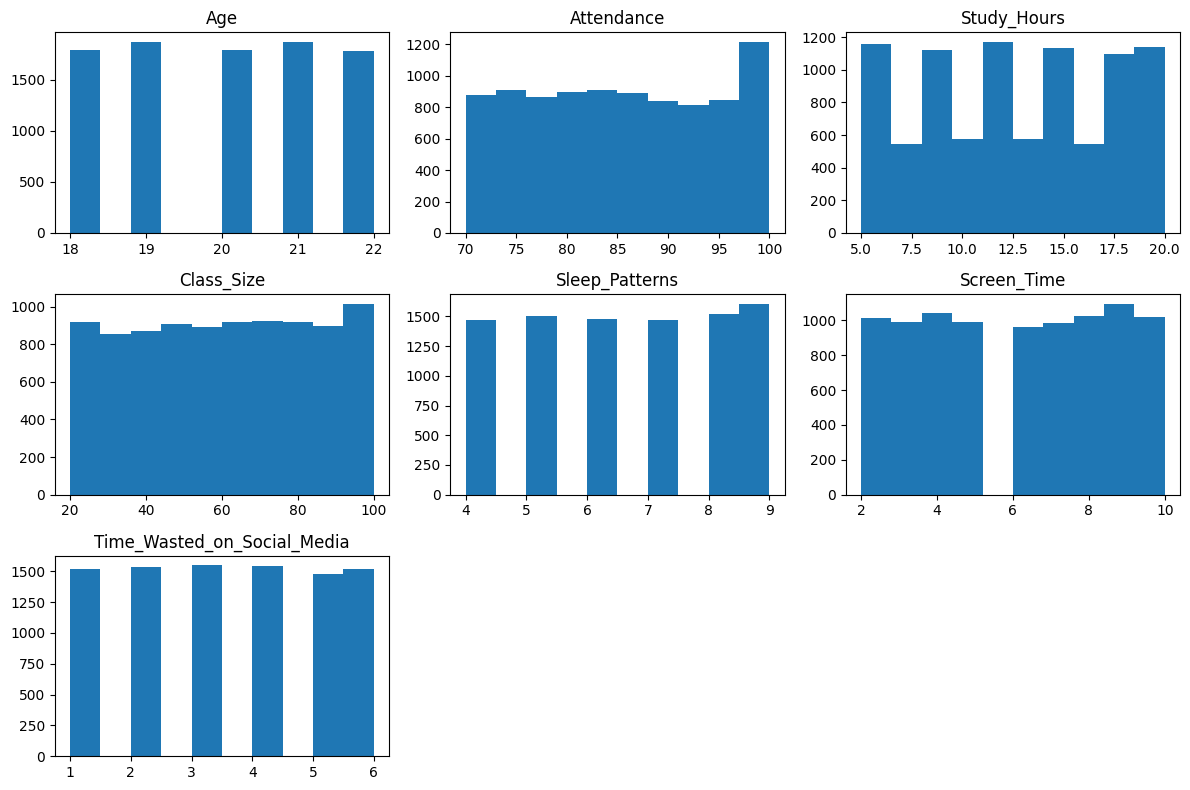

In [12]:
df.hist(figsize=(12, 8), bins=10, grid=False)

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()


### Diagrama de torta de variables categóricas

De igual manera se desea conocer como se distribuyen las variables categóricas, por lo cual se cran diagramas de torta de todas esas columnas utilizando la siguiente expresión.

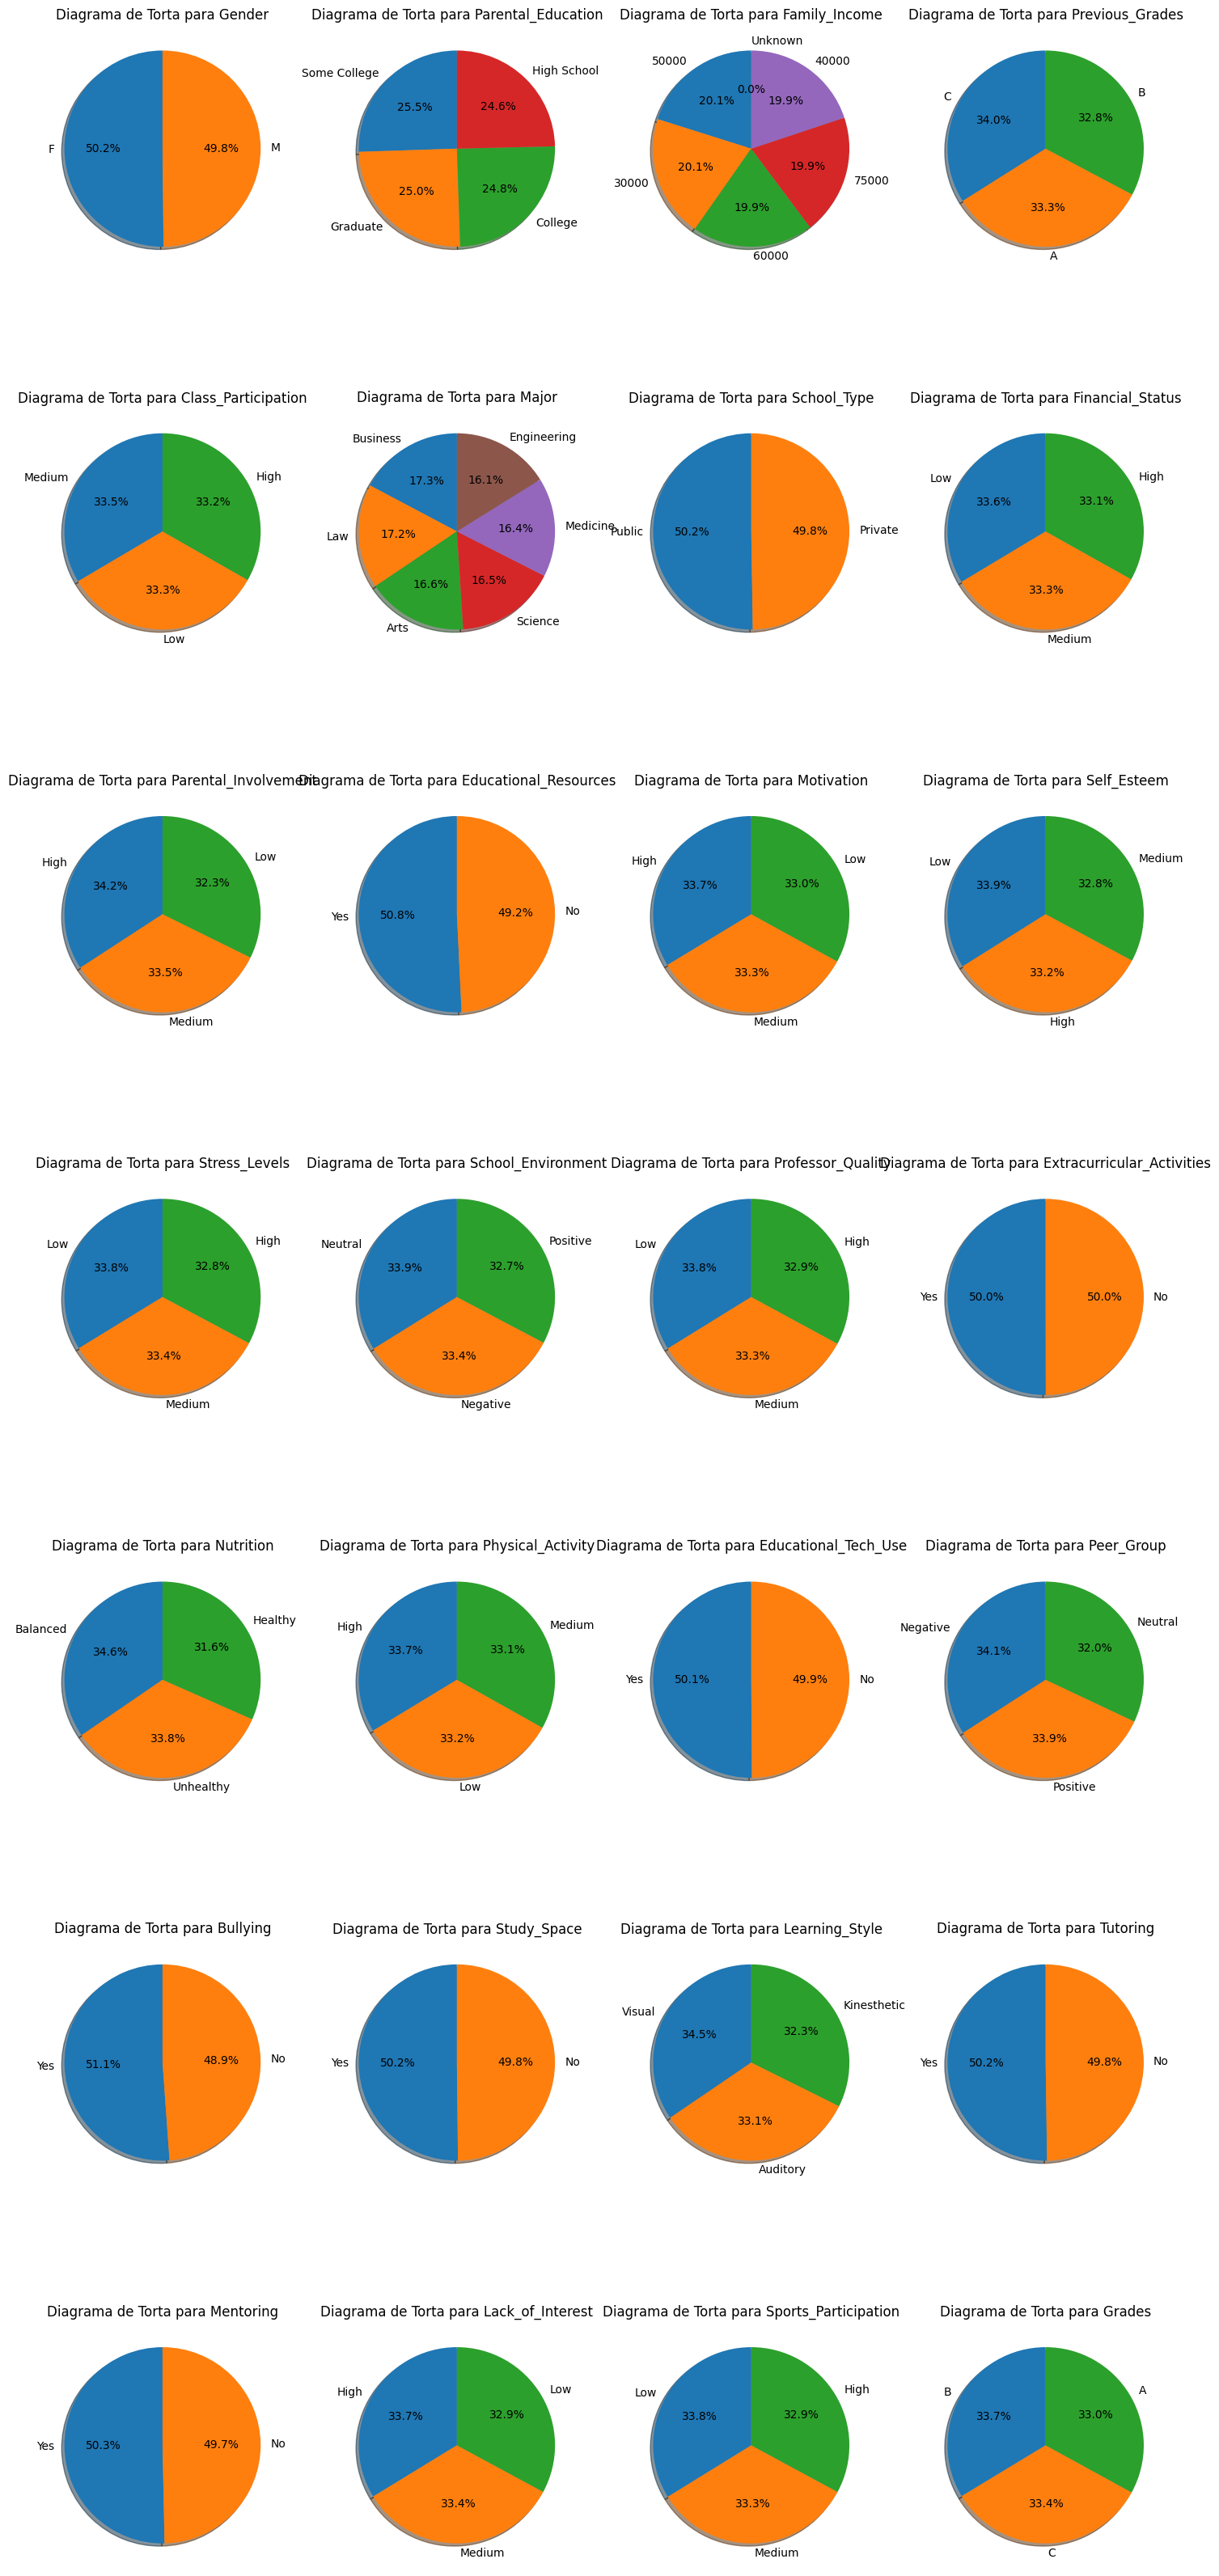

In [13]:
# Identificar las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Determinar el número de filas necesarias
num_cols = 4
num_rows = math.ceil(len(categorical_columns) / num_cols)

# Crear la figura y los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows))

# Asegurarse de que axes sea una matriz bidimensional incluso si hay una sola fila
axes = axes.reshape(-1, num_cols)

# Crear un diagrama de torta para cada columna categórica
for idx, column in enumerate(categorical_columns):
    ax = axes[idx // num_cols, idx % num_cols]
    df[column].value_counts().plot.pie(ax=ax, autopct='%1.1f%%', startangle=90, shadow=True)
    ax.set_title(f'Diagrama de Torta para {column}')
    ax.set_ylabel('')


### Tabla de contingencia de calificaciones y otras variables categóricas

Complementariamente para comprender mejor la distribución de las variables categóricas sea un mapa de calor de la tabla de contingencia de las variables categóricas agrupadas por calificación.

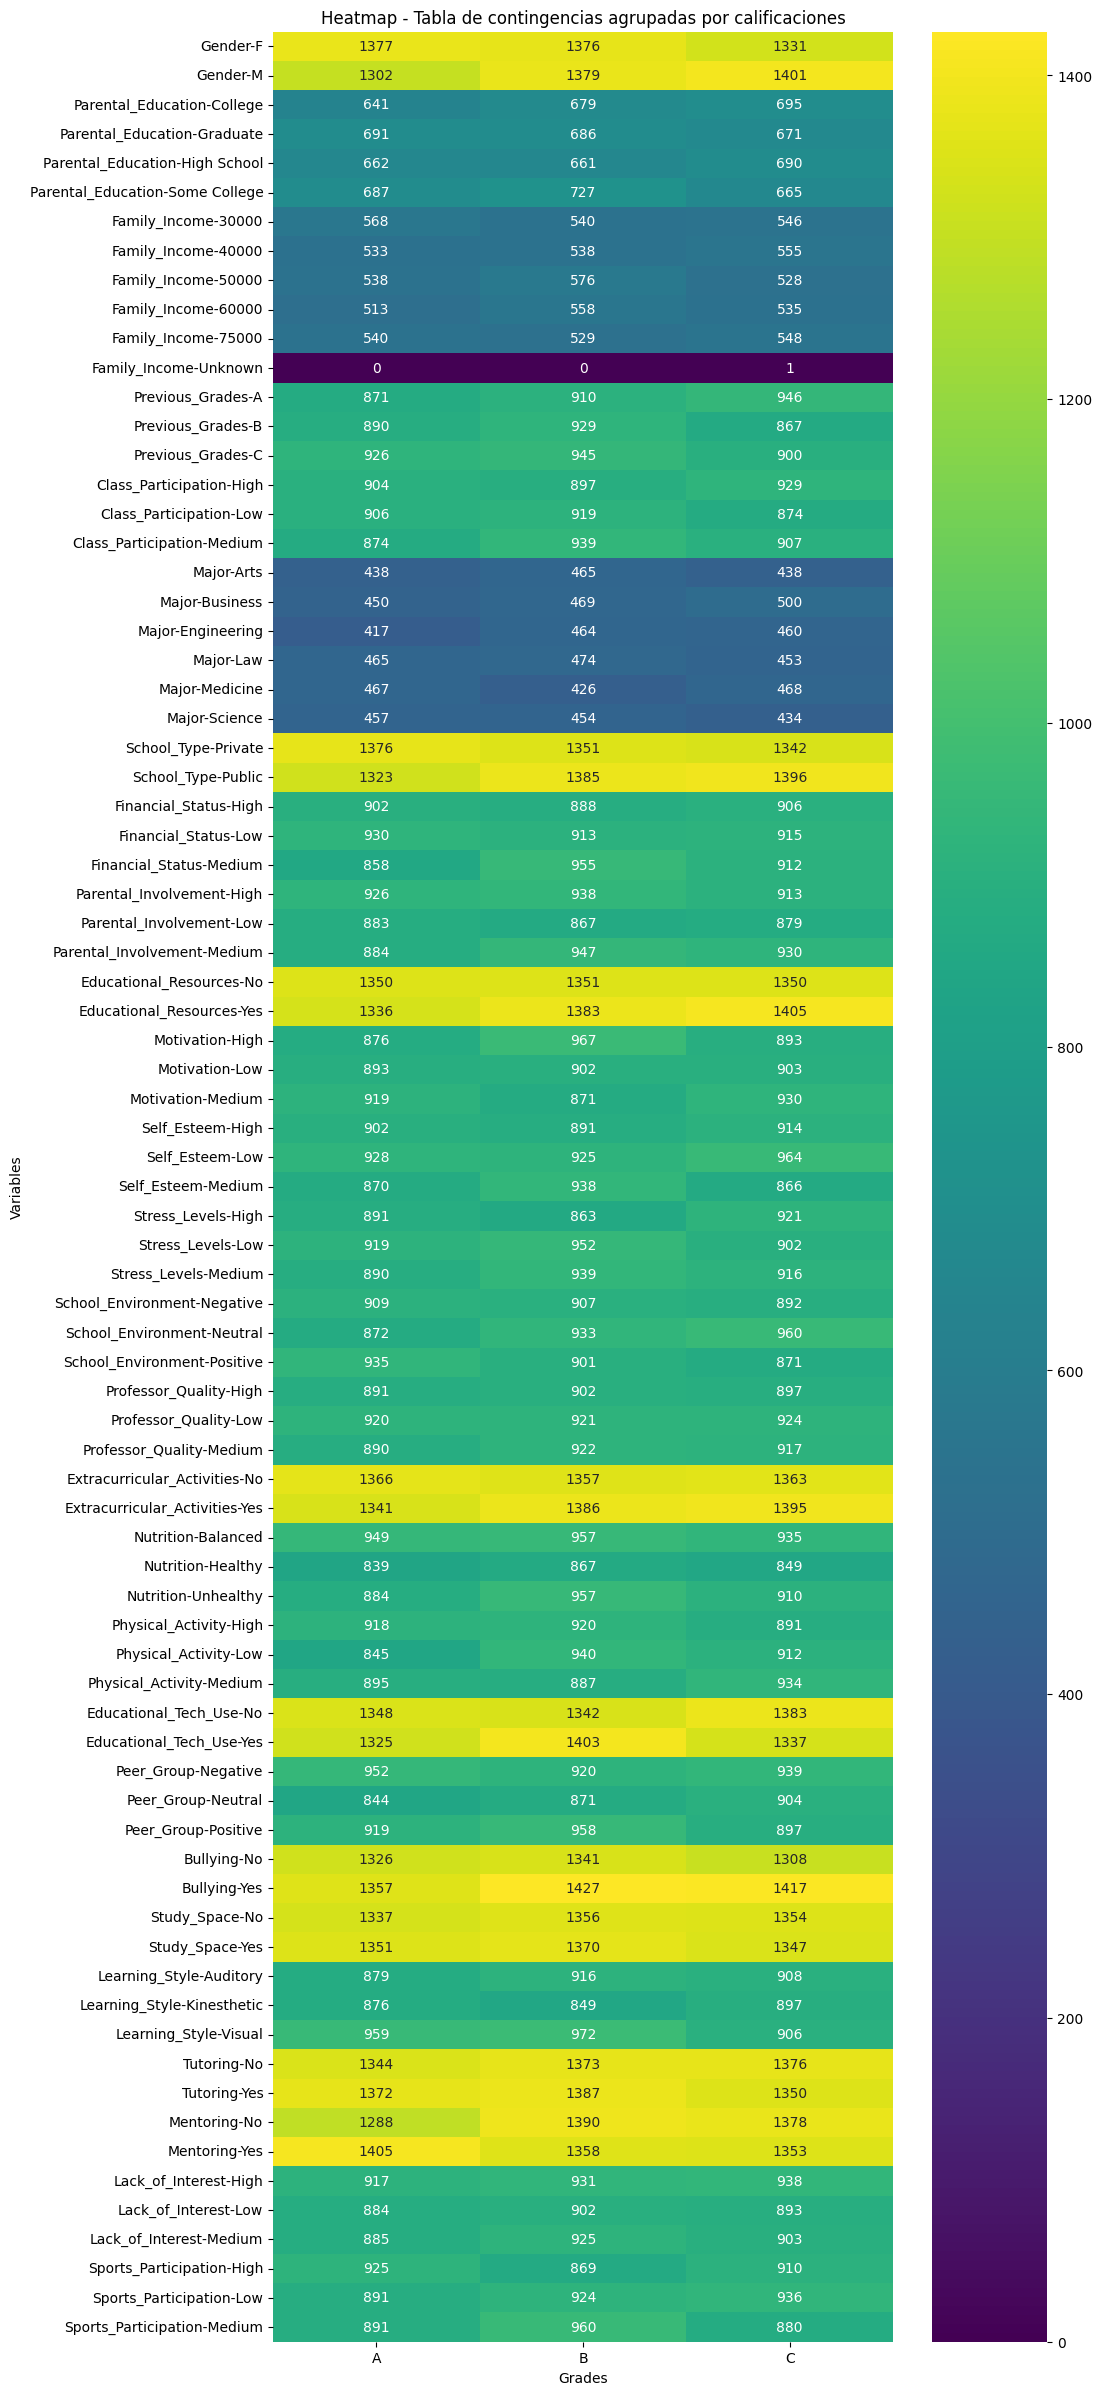

In [14]:
# Seleccionar columnas categóricas (object)
categorical_columns = df.select_dtypes(include='object').columns

# Crear tablas de contingencia para cada columna categórica con respecto a 'Grades'
contingency_tables = {}
for col in categorical_columns:
    if col != 'Grades':  # Asegúrate de no incluir la columna 'Grades' en sí misma
        contingency_tables[col] = pd.crosstab(df[col], df['Grades'])

# Concatenar todas las tablas de contingencia
all_contingencies = pd.concat(contingency_tables.values(), keys=contingency_tables.keys())

# Crear heatmap con seaborn
plt.figure(figsize=(10, 30))
sns.heatmap(all_contingencies, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.title('Heatmap - Tabla de contingencias agrupadas por calificaciones')
plt.xlabel('Grades')
plt.ylabel('Variables')
plt.show()

En base a los diagramas creados anteriormente se observa que este dataset tiene sus datos distribuidos de forma equilibrada en todas sus variables.

### Calificación de estudiantes por género y participación

El siguiente fragmento de código crea dos diagramas de columnas apiladas. El primero muestra el porcentaje de hombres y mujeres en cada calificación (A, B y C). El segundo muestra el porcentaje de alumnos con alta, media y baja participación en cada una de las calificaciones.


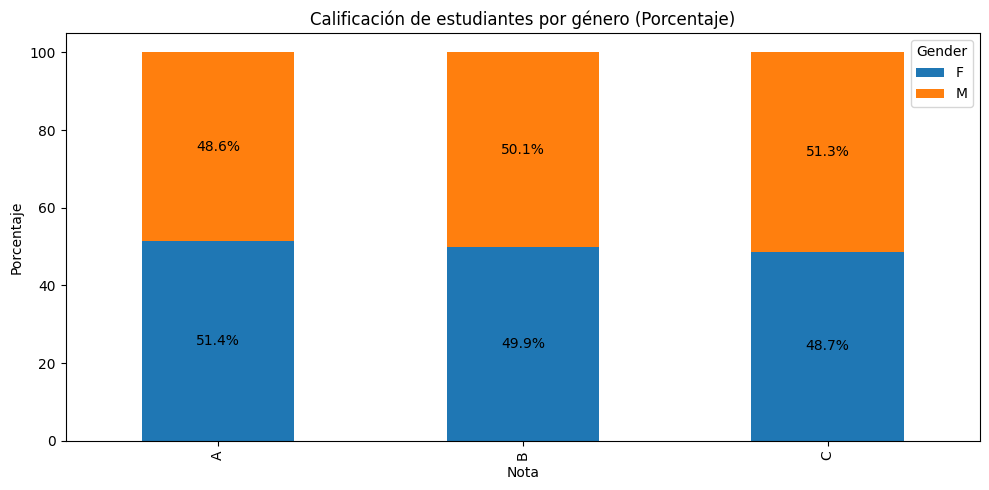

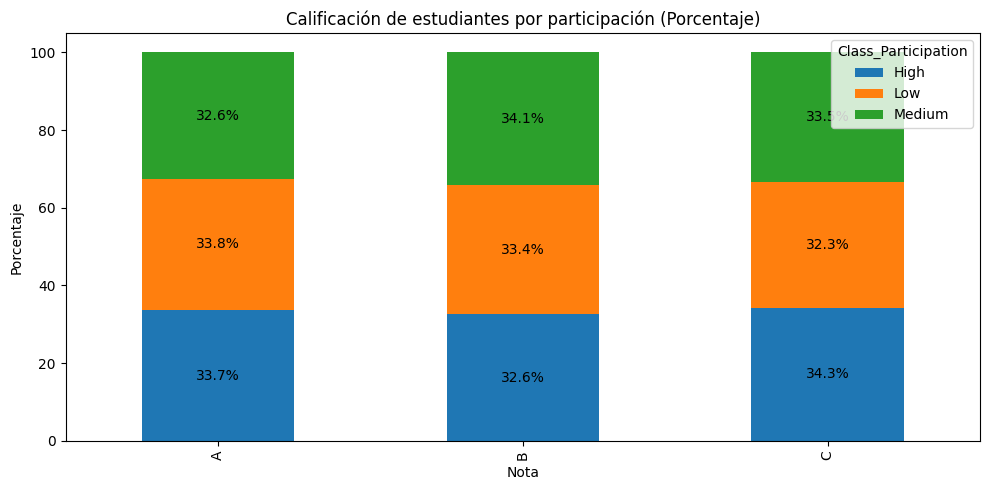

In [15]:
# Datos de Notas de estudiantes por género
df_grades = df.groupby('Grades')['Gender'].value_counts()
df_grades_unstacked = df_grades.unstack()

# Calcular los porcentajes
df_grades_percent = df_grades_unstacked.div(df_grades_unstacked.sum(axis=1), axis=0) * 100

# Primer gráfico: Notas de estudiantes por género (porcentaje)
ax1 = df_grades_percent.plot(kind='bar', stacked=True, figsize=(10, 5))
ax1.set_xlabel("Nota")
ax1.set_ylabel("Porcentaje")
ax1.set_title("Calificación de estudiantes por género (Porcentaje)")

# Anotar los porcentajes en las barras
for container in ax1.containers:
    ax1.bar_label(container, label_type='center', fmt='%.1f%%')

plt.tight_layout()
plt.show()

# Datos de Notas de estudiantes por participación
df_participation = df.groupby('Grades')['Class_Participation'].value_counts()
df_participation_unstacked = df_participation.unstack()

# Calcular los porcentajes
df_participation_percent = df_participation_unstacked.div(df_participation_unstacked.sum(axis=1), axis=0) * 100

# Segundo gráfico: Notas de estudiantes por participación (porcentaje)
ax2 = df_participation_percent.plot(kind='bar', stacked=True, figsize=(10, 5))
ax2.set_xlabel("Nota")
ax2.set_ylabel("Porcentaje")
ax2.set_title("Calificación de estudiantes por participación (Porcentaje)")

# Anotar los porcentajes en las barras
for container in ax2.containers:
    ax2.bar_label(container, label_type='center', fmt='%.1f%%')

plt.tight_layout()
plt.show()



En la relación de calificaciones de estudiantes por genero se observa que en la calificación A existen ligeramente mas personas del género masculino que femenino y en las calificaciones B y C existen mas personas del género femenino. Sin embargo, en cada una de las calificaciones la diferencia entre género masculino y femenino no es significativa, por lo cual no se puede concluir que el género por si sólo sea un factor que influya significativamente en las calificaciones de los estudiantes.

De igual manera en el gráfico que relaciona la calificación de los estudiantes por participación, se observa que en cada una de las tres calificaciones existe un porcentaje similar de estudiantes con participación alta, media y baja. Por lo tanto la participación en clase tampoco existe un patrón evidente que demuestre la influencia de la participación en clases en la calificación final del estudiante.

### Influencia de otras variables categóricas

En base a los resultados de los gráficos anteriores se desea conocer si alguna de las variables categóricas por si sola tiene una influencia evidente en las posibles calificaciones de los estudiantes.

Para esto se crea el siguiente fragmento de código que crea diagramas de barras apiladas de todas las variables categóricas que tienen como categorías "Low", Medium" y "High".

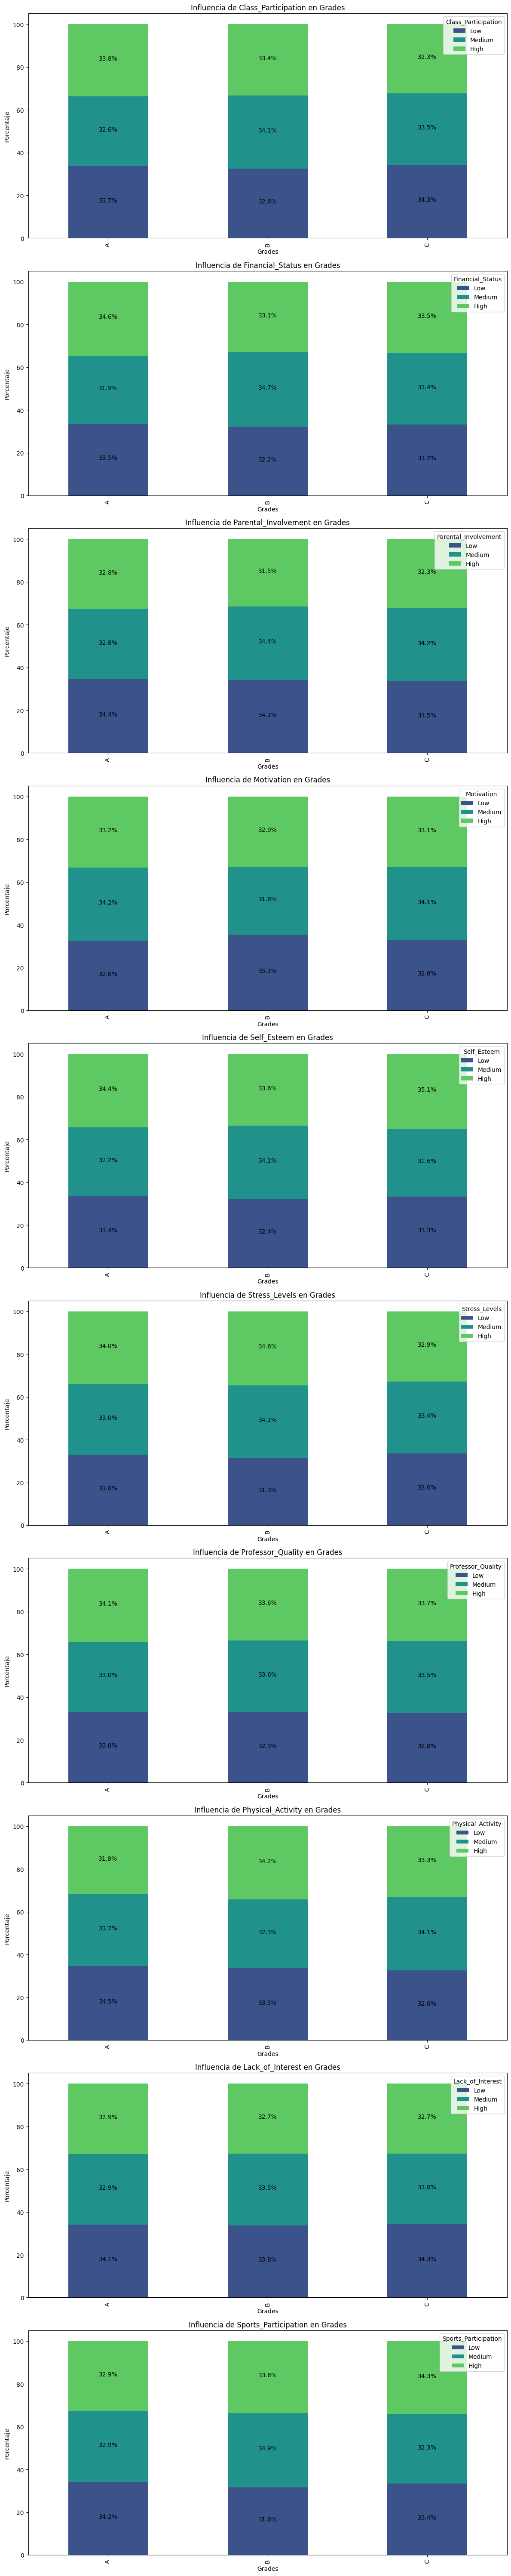

In [19]:
# Identificar las columnas que contienen los valores 'Low', 'Medium' y 'High'
categorical_columns = [col for col in df.columns if df[col].isin(['Low', 'Medium', 'High']).any()]

# Definir el orden deseado
order = ['High', 'Medium', 'Low']

# Crear subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(12, 6 * len(categorical_columns)))

# Si solo hay una variable categórica, axes no será un array, por lo que lo convertimos en una lista
if len(categorical_columns) == 1:
    axes = [axes]

# Generar gráficos de barras apiladas para cada variable categórica
for ax, col in zip(axes, categorical_columns):
    cross_tab = pd.crosstab(df['Grades'], df[col], normalize='index') * 100  # Multiplicar por 100 para obtener porcentajes
    cross_tab = cross_tab[order]  # Reordenar las columnas en el orden deseado
    cross_tab = cross_tab.reindex(['A', 'B', 'C'])  # Reordenar las filas en caso necesario
    cross_tab.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette("viridis", len(order)))
    ax.set_title(f'Influencia de {col} en Grades')
    ax.set_xlabel('Grades')
    ax.set_ylabel('Porcentaje')
    ax.legend(title=col, labels=order[::-1])  # Invertir el orden para la leyenda

    # Añadir porcentajes a las barras
    for container in ax.containers:
        labels = [f'{v.get_height():.1f}%' for v in container]
        ax.bar_label(container, labels=labels, label_type='center', padding=3)

plt.tight_layout()
plt.show()

### Distribución del porcentaje de asistencia en las calificaciónes

Este fragmento de código crea un diagrama que ilustra como se distribuyen las notas según rangos de porcentaje de asistencia.

<ipython-input-20-da716a1f1c4d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Attendance Interval'] = pd.cut(cleaned_df['Attendance'], bins=bins, labels=labels, right=False)


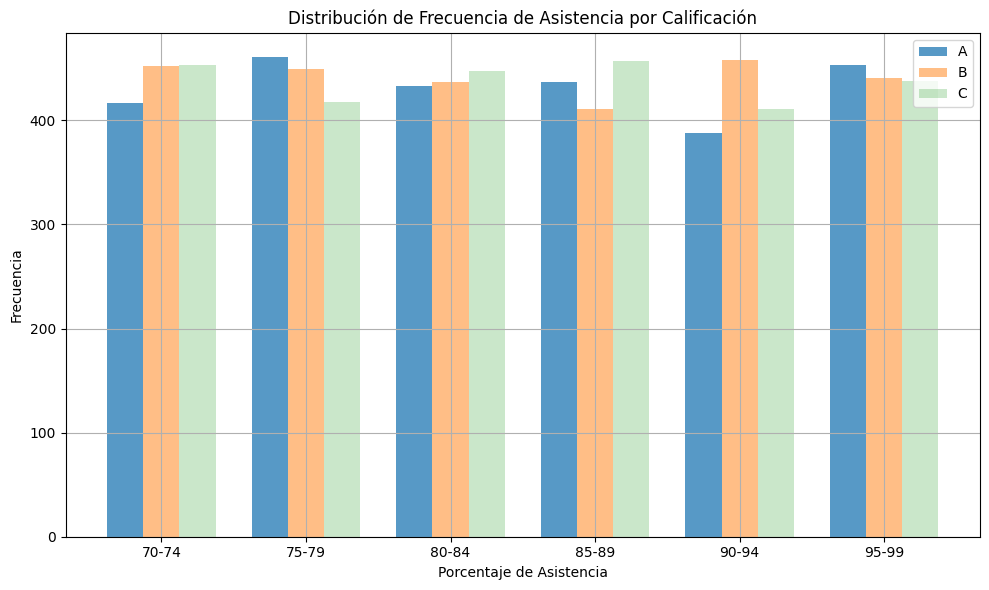

In [20]:
# Eliminar filas con valores NaN en la columna 'Attendance'
cleaned_df = df.dropna(subset=['Attendance'])

# Definir los intervalos
bins = range(70, 101, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]

# Crear una nueva columna en el DataFrame con los intervalos
cleaned_df['Attendance Interval'] = pd.cut(cleaned_df['Attendance'], bins=bins, labels=labels, right=False)

# Calcular las frecuencias de los intervalos de asistencia para cada calificación
attendance_counts_A = cleaned_df[cleaned_df['Grades'] == 'A']['Attendance Interval'].value_counts().sort_index()
attendance_counts_B = cleaned_df[cleaned_df['Grades'] == 'B']['Attendance Interval'].value_counts().sort_index()
attendance_counts_C = cleaned_df[cleaned_df['Grades'] == 'C']['Attendance Interval'].value_counts().sort_index()

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot de frecuencias de asistencia por calificación
bar_width = 0.25
x = range(len(bins) - 1)
ax.bar(x, attendance_counts_A.reindex(labels, fill_value=0).values, width=bar_width, alpha=0.75, label='A')
ax.bar([i + bar_width for i in x], attendance_counts_B.reindex(labels, fill_value=0).values, width=bar_width, alpha=0.5, label='B')
ax.bar([i + 2 * bar_width for i in x], attendance_counts_C.reindex(labels, fill_value=0).values, width=bar_width, alpha=0.25, label='C')

ax.set_xticks([i + bar_width for i in x])
ax.set_xticklabels(labels)
ax.set_xlabel('Porcentaje de Asistencia')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de Frecuencia de Asistencia por Calificación')
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


Según la intuición se podría mencionar la asistencia a clases tiene una influencia significativa en las calificaciones de los estudiantes, sin embargo al observar el diagrama, se puede observar que existen rangos de alta participación (por ejemplo el rango 90%-94%) donde la cantidad de calificaciones A son menores a las calificaciones C. También el rango 75%-79% que es el segundo rango de menor participación tiene mayor cantidad de calificaciones A que califcaciones C.

A nivel general según lo observado en el diagrama, no se encuentra un parón evidente entre el porcentaje de asistencia y las calificaciones de los estudiantes.

### Distribución de horas de estudio en las calificaciónes

El siguiente fragmento de código crea un diagrama de líneas con las áreas bajo la curva sombreadas para comparar la distribución de las calificaciones respecto a la cantidad de horas de estudio.

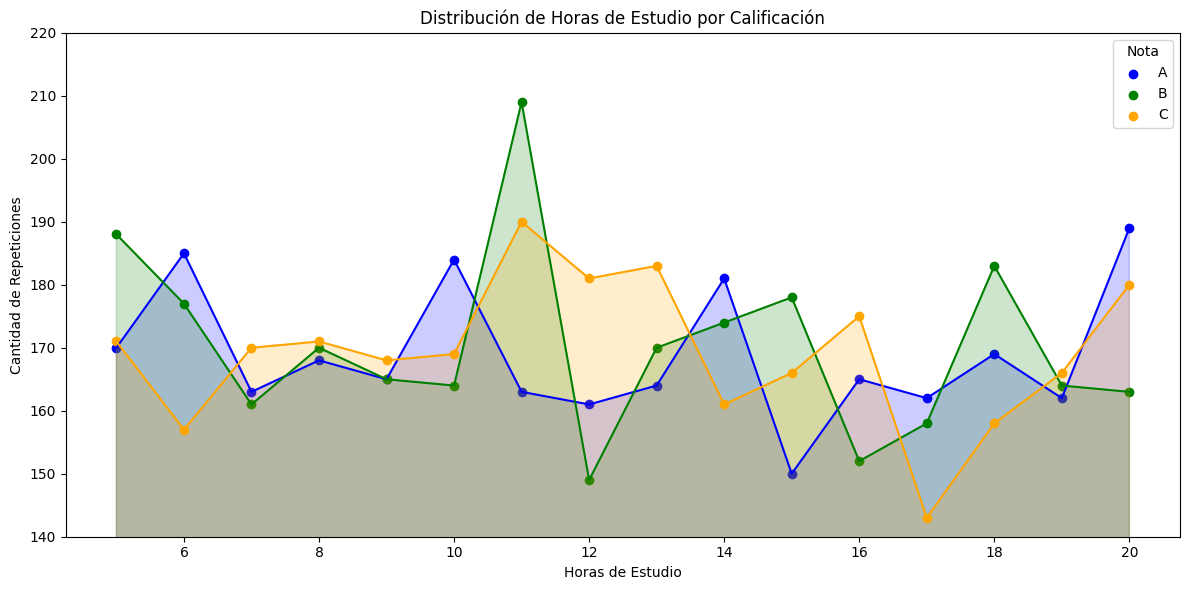

In [21]:
# Eliminar filas con valores NaN en la columna 'Study_Hours'
cleaned_df = df.dropna(subset=['Study_Hours'])

# Agrupar los datos por horas de estudio y calificación, y contar las repeticiones de cada combinación
grouped_data = cleaned_df.groupby(['Study_Hours', 'Grades']).size().unstack(fill_value=0)

# Crear el scatter plot
fig, ax = plt.subplots(figsize=(12, 6))

# Definir los colores para cada calificación
colors = {'A': 'blue', 'B': 'green', 'C': 'orange'}

# Crear un scatter plot para cada calificación
for grade in grouped_data.columns:
    ax.scatter(grouped_data.index, grouped_data[grade], color=colors[grade], label=grade)

     # Unir los puntos de la misma categoría con líneas
    ax.plot(grouped_data.index, grouped_data[grade], color=colors[grade], linestyle='-')

     # Sombrear el área bajo la curva
    ax.fill_between(grouped_data.index, grouped_data[grade], color=colors[grade], alpha=0.2)

# Agregar etiquetas y título
# Configuración de las etiquetas y el título
ax.set_xlabel('Horas de Estudio')
ax.set_ylabel('Cantidad de Repeticiones')
ax.set_ylim(140,220)
ax.set_title('Distribución de Horas de Estudio por Calificación')
ax.legend(title='Nota')

plt.tight_layout()
plt.show()


En base al gráfico generado se observa que de los estudiantes que obtuvieron calificación A, la mayoría de ellos estudiaron 6, 10, 14 y 20 horas. Los estudiantes que obtuvieron calificación B la mayoría de ellos estudiarion 5 y 11 horas. En el caso de los estudiantes con calificación C, la mayoría de ellos estudiaron entre 11 y 13 horas.

Igual que en el diagrama anterior este diagrama demuestra que en contra de la intuición, una mayor cantidad de horas de estudio no necesariamente implica por si sola una mayor posibilidad de obtener una mejor calificación.

### Influencia de estilo de estudio y horas de estudio en las calificaciones

Al no poder observar una relación evidente de cómo alguna variable influye en las calificaciones se comienza a indagar la influencia de dos variables en su conjunto.

En primera instancia se crea este bloque de código que crea un diagrama de violín para observar como el estilo de estudio y la cantidad de horas de estudio influyen en las calificaciones de los estudiantes.

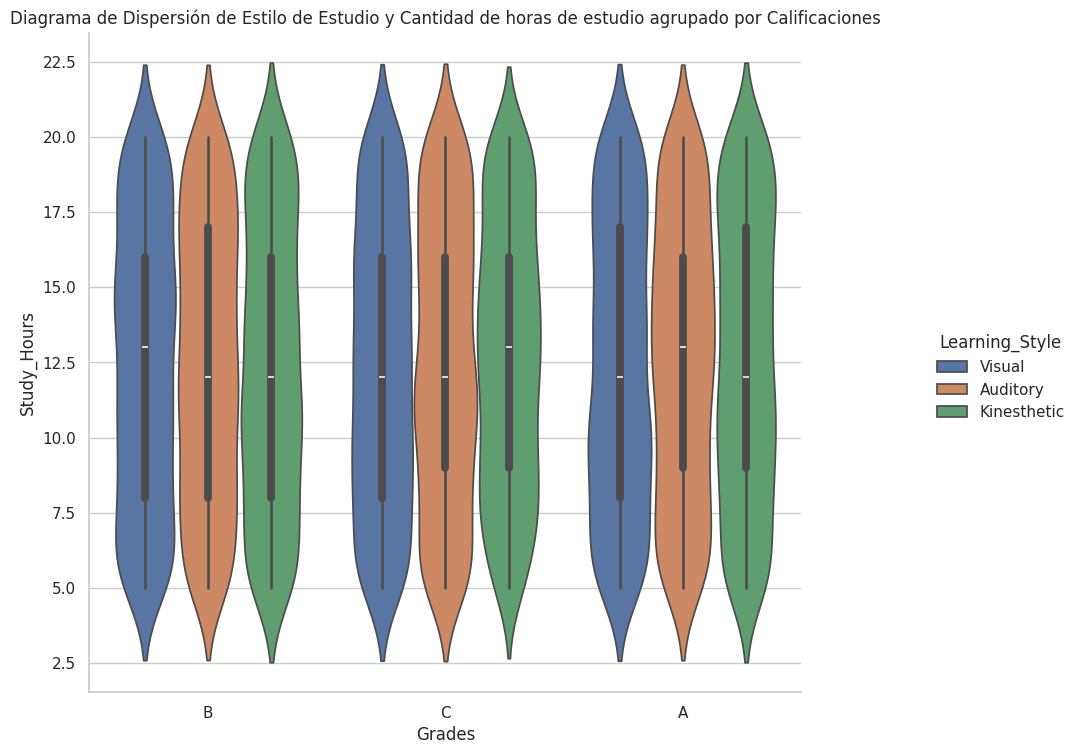

In [22]:
# Filtrar las filas donde no hay valores nulos en 'Learning_Style', 'Study_Hours' y 'Grades'
df_filtered = df[['Learning_Style', 'Study_Hours', 'Grades']].dropna()

# Crear el diagrama de dispersión usando seaborn
sns.set(style="whitegrid")
scatter_plot = sns.catplot(data=df_filtered,
                               x='Grades',
                               y='Study_Hours',
                               hue='Learning_Style',
                               kind='violin')

# Configurar las etiquetas y el título del gráfico
scatter_plot.set(title='Diagrama de Dispersión de Estilo de Estudio y Cantidad de horas de estudio agrupado por Calificaciones',
                 xlabel='Grades',
                 ylabel='Study_Hours')

# Mostrar el gráfico
scatter_plot.figure.set_size_inches(12, 8)
#scatter_plot.legend(title='Grades')
#sns.despine()
scatter_plot.figure.show()


En base al diagrama generado no se evidencia que algún estilo de estudio en particular genere mejores o peores calificaciones o que tenga influencia en la cantidad de horas de estudio necesarias para obtener determinada calificación.

### Influencia de la cantidad de horas de estudio en las calificaciones por tipo de estudio

El siguiente código continua la búsqueda de patrones utilizando dos variables que se relacionen con las calificaciones. En este caso se crea un boxplot de las calificaciones según horas de estudio para las diferentes carreras.

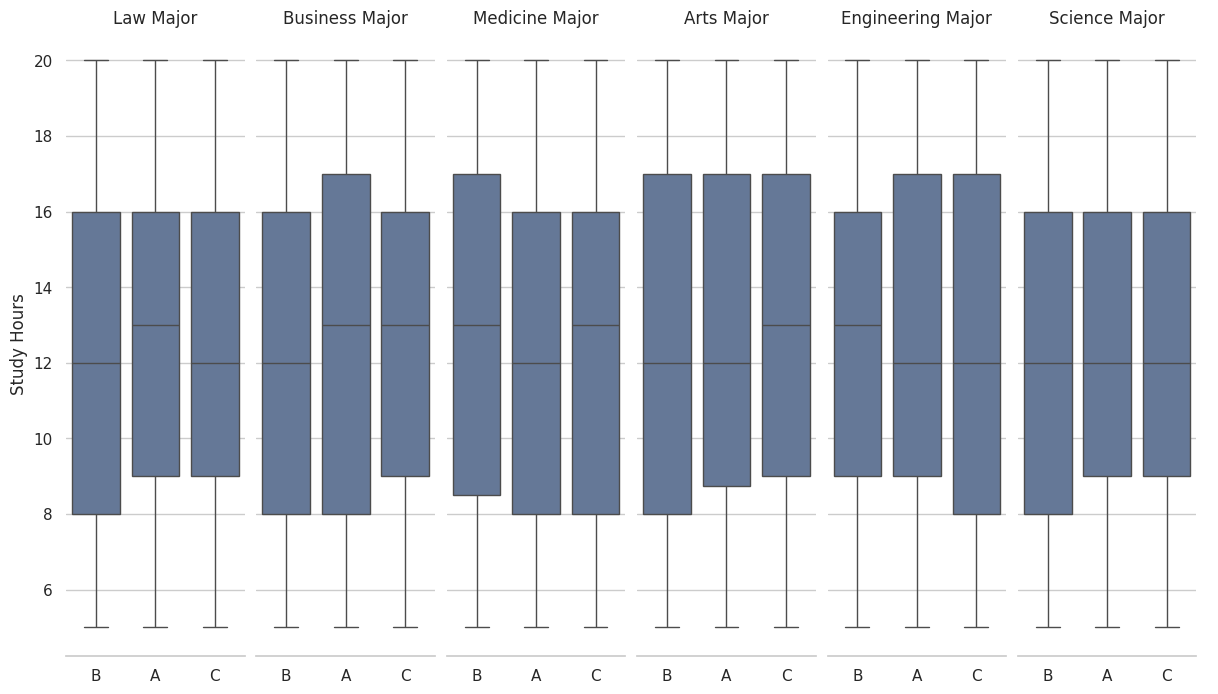

In [23]:
plot = sns.catplot(x="Grades", y="Study_Hours", col="Major",
                data=df, saturation=.5,
                kind="box", aspect=.6)

(plot.set_axis_labels("", "Study Hours")
  #.set_xticklabels(["A", "B", "C"])
  .set_titles("{col_name} {col_var}")
  .despine(left=True))

# Mostrar el gráfico
plot.figure.set_size_inches(12, 8)
#plot.legend(title='Grades')

plot.figure.show()

En este diagrama se puede observar que dependiendo de la carrera del estudiante la distribución de los dato de calificaciones respecto a las horas de estudio es ligeramente diferente. Por ejemplo los estudiantes que estudian "Business" tienen un rango intercuartil mas amplio que los estudiantes de "Science".

###Análisis Multivariado con diagrama de coordenadas paralelas

El siguiente fragmento de código crea un diagrama de coordenadas paralelas para observar la influencia de diferentes variables en su conjunto en las calificaciones de los estudiantes. Los valores han sido normalizados para que todas las variables se encuentren en la misma escala.

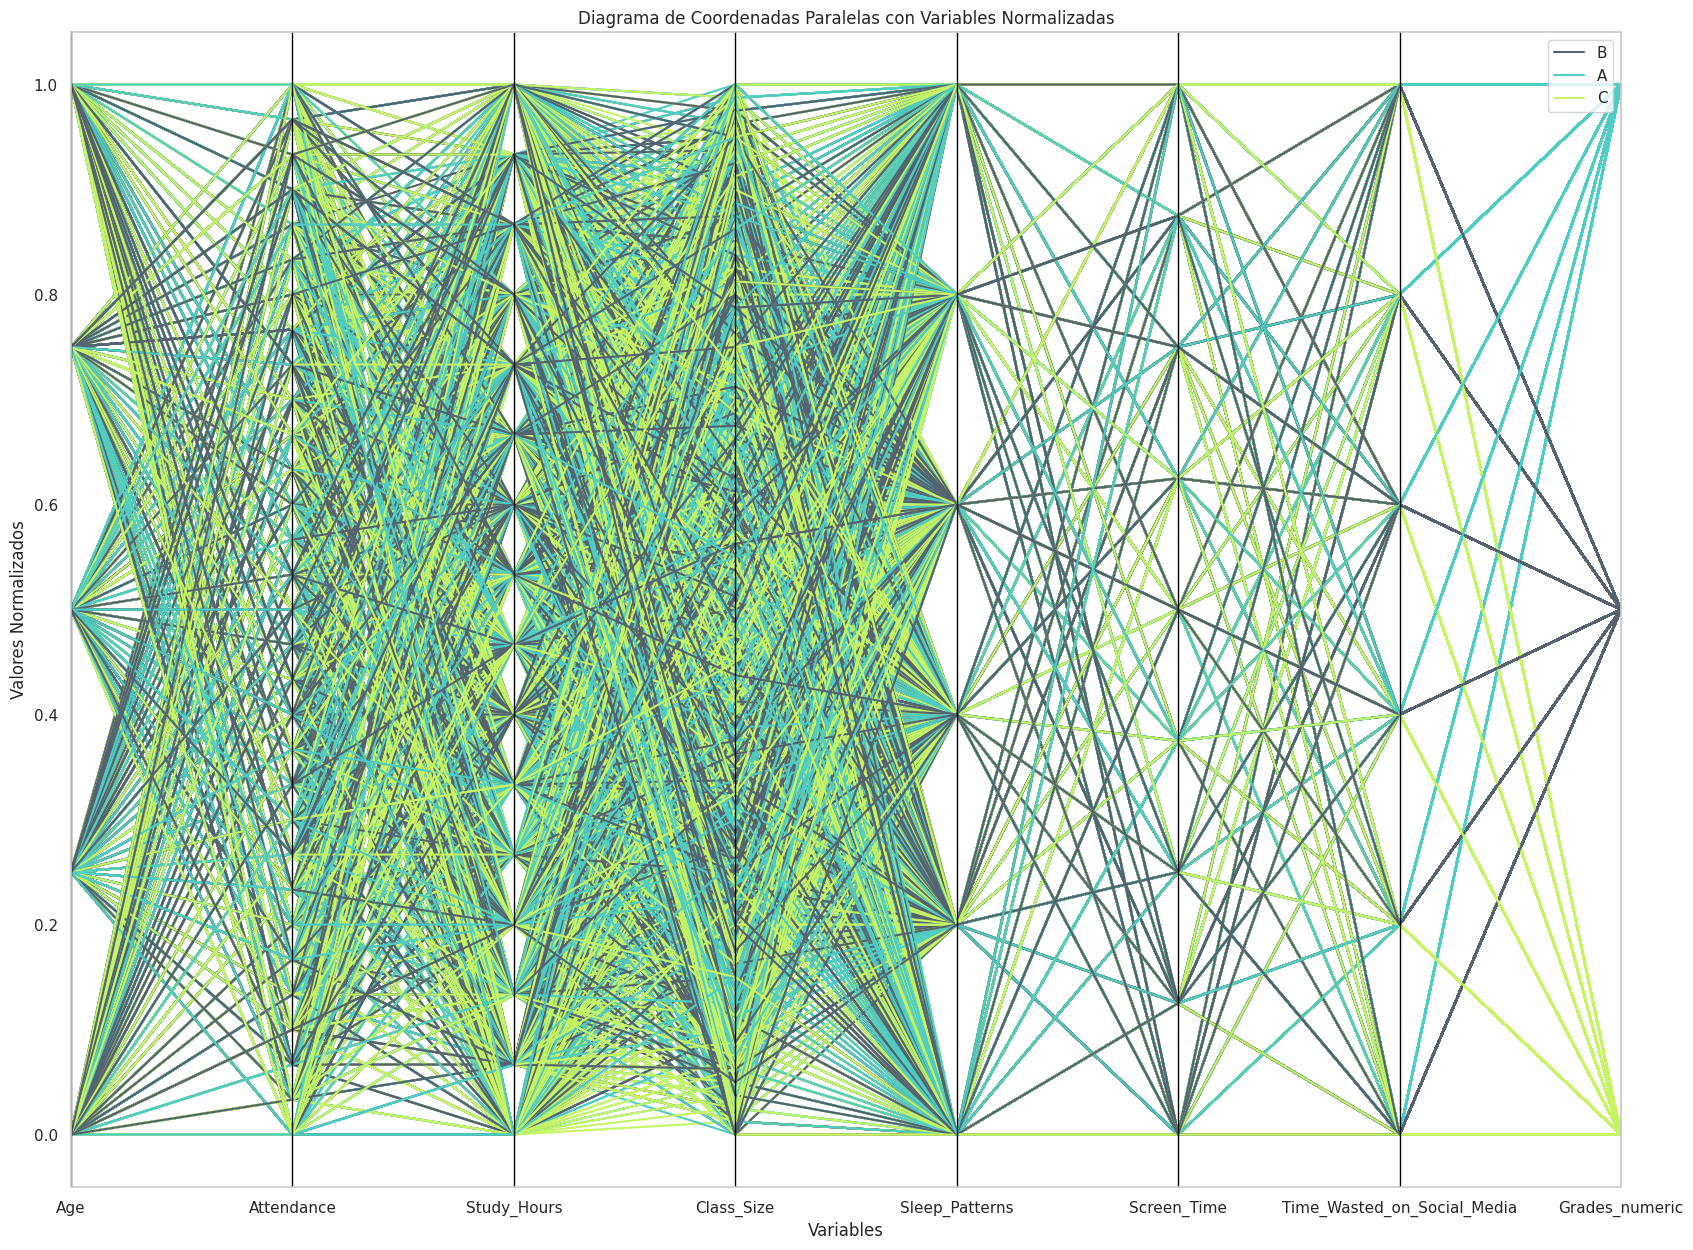

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

df_filtered = df[['Age', 'Attendance', 'Study_Hours', 'Class_Size', 'Sleep_Patterns','Screen_Time', 'Time_Wasted_on_Social_Media','Grades']].dropna()

# Convertir la columna 'Grades' en valores numéricos
grades_mapping = {'A': 100, 'B': 50, 'C': 0}
df_filtered['Grades_numeric'] = df_filtered['Grades'].map(grades_mapping)

# Seleccionar las columnas numéricas incluyendo 'Grades_numeric'
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns.append('Grades_numeric')

# Normalizar las columnas numéricas
scaler = MinMaxScaler()
df_filtered[numerical_columns] = scaler.fit_transform(df_filtered[numerical_columns])

# Añadir la columna 'Grades' nuevamente para el gráfico
#df_filtered['Grades'] = df['Grades']

# Crear el diagrama de coordenadas paralelas
plt.figure(figsize=(20, 15))
pd.plotting.parallel_coordinates(df_filtered, 'Grades', cols=numerical_columns, color=('#556270', '#4ECDC4', '#C7F464'))
plt.title('Diagrama de Coordenadas Paralelas con Variables Normalizadas')
plt.xlabel('Variables')
plt.ylabel('Valores Normalizados')
plt.legend(loc='upper right')
plt.show()

Al observar el diagrama se aprecia que las combinaciones de valores de los datos numéricos muestran una tendencia aparentemente aleatoria independiente de la calificación del estudiante. Este gráfico demuestra la dificultad de visualizar el comportamiento de los datos, debido al alto nivel de dimensiones que se deben analizar para encontrar un patrón en ellos.

### Insight Generales en base a lo observado

En base a los gráficos generados anteriormente se concluye que no existe un patrón evidente de las calificaciones de los estudiantes en base a análisis univariados y bivariados. Para poder predecir qué nota obtendrá un estudiante es necesario considerar múltiples variables categóricas y numéricas en su conjunto lo cual lo convierte en un análisis casi imposible de lograr a través de visualizaciones.

Es decir, con esto se cumple la segunda hipótesis que las diferentes variables del dataset por si solas no son suficientes para encontrar un patrón, sino que es necesario analizar el comportamiento de varias variables en su conjunto.

En el caso de la primera hipótesis, con las visualizaciones que se tienen por el momento se puede afirmar que por si solas la asistencia y horas de estudio de los estudiantes no definen por si sola la posible nota que podría obtener un estudiante. Sin embargo aun no es posible afirmar si esos parámetros se encuentran dentro de los más importantes o no.

La dificultad de generar insights con las visualizaciones generadas justifica la necesidad de utilizar modelos de Machine Learning para crear un modelo predictor de notas de los estudiantes en base a las diferentes variables y/o un modelo que asigne la importancia a cada una de las variables respecto a su influencia en las calificaciones de los estudiantes.
